In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [14]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
# here 60000 show the number of images for training and 28,28 shows each image is of 28 * 28 pixels
X_train.shape 

(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

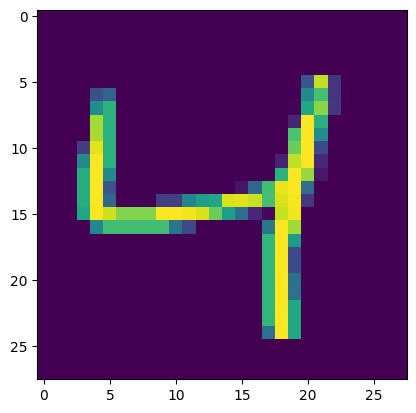

In [10]:
# converting this arrays into image
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [ ]:
# normalizing the dataset between 0 to 1 
# normalizing is important in ANN as it makes training efficient

In [15]:
X_train = X_train/255
X_test = X_test/255


In [16]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [27]:
model =Sequential()
model.add(Flatten(input_shape =(28,28))) #converts our 2d array into 1d array
model.add(Dense(128,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(10, activation="softmax"))


In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer = "Adam",metrics = "accuracy")

In [30]:
history = model.fit(X_train,y_train,epochs = 25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2794 - accuracy: 0.9176 - val_loss: 0.1555 - val_accuracy: 0.9553
Epoch 2/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1204 - accuracy: 0.9648 - val_loss: 0.1148 - val_accuracy: 0.9671
Epoch 3/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0862 - accuracy: 0.9743 - val_loss: 0.1065 - val_accuracy: 0.9678
Epoch 4/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0654 - accuracy: 0.9800 - val_loss: 0.0918 - val_accuracy: 0.9731
Epoch 5/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0488 - accuracy: 0.9850 - val_loss: 0.1004 - val_accuracy: 0.9722
Epoch 6/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0390 - accuracy: 0.9882 - val_loss: 0.1247 - val_accuracy: 0.9645
Epoch 7/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0339 - accuracy: 0.9883 - val_loss: 0.1169 - val_accuracy:

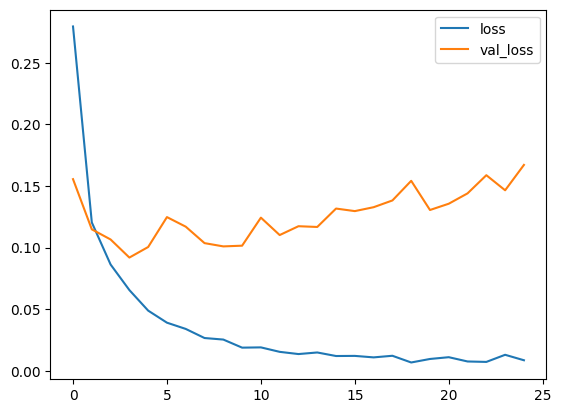

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label = "loss")
plt.plot(history.history['val_loss'],label = "val_loss")
plt.legend()
plt.show()

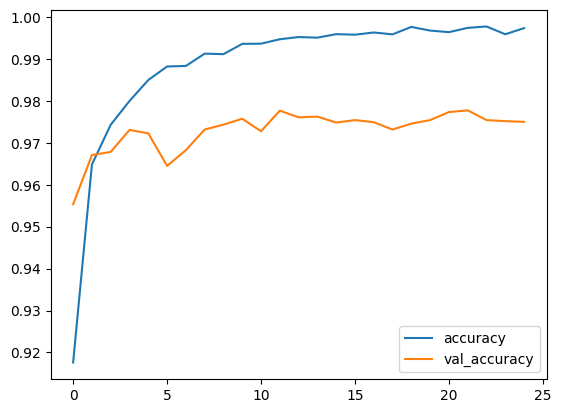

In [33]:
plt.plot(history.history['accuracy'],label = "accuracy")
plt.plot(history.history['val_accuracy'],label = "val_accuracy")
plt.legend()
plt.show()

In [34]:
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 998us/step


In [35]:
y_pred = y_prob.argmax(axis = 1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

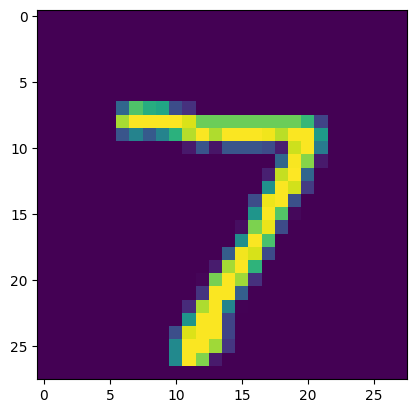

In [36]:
plt.imshow(X_test[0])

In [38]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis = 1)

1/1 [==============================] - 0s 14ms/step


array([7])